In [192]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
from get_neuralynx import *
from pathlib import Path
import h5py
import seaborn as sns

In [193]:
dataDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/'
animal = 'Li'
task = 'T3g'
date = '060418'

FolderName = animal+'_'+task+'_'+date

fp = Path(dataDir+FolderName)
sp = Path(dataDir+FolderName+'_Results')
sp.mkdir(parents=True, exist_ok=True) 

csc_files = []
ev_files = []
vt_files = []
for i in fp.glob('*.ncs'):
    if i.stat().st_size>16384:
        csc_files.append((i.name, i.stem, str(i.absolute()), time.ctime(i.stat().st_atime)))
for i in fp.glob('*.nev'):
    if i.stat().st_size>16384:
        ev_files.append((i.name, i.stem, str(i.absolute()),  time.ctime(i.stat().st_atime)))
for i in fp.glob('*.nvt'):
    if i.stat().st_size>16384:
        vt_files.append((i.name, i.stem, str(i.absolute()),  time.ctime(i.stat().st_atime)))

t,x,y = get_position(vt_files[0][2])
ev = get_events(ev_files[0][2])

with h5py.File(str(sp / ev_files[0][1])+'.h5', 'w') as hf:
    for k,v in ev.items(): 
        hf.create_dataset(k,  data=v)

with h5py.File(str(sp / vt_files[0][1])+'.h5', 'w') as hf:
    hf.create_dataset("t",  data=t)
    hf.create_dataset("x",  data=x)
    hf.create_dataset("y",  data=y)

# To read from h5 files:
# with h5py.File(str(sp / vt_files[0][1])+'.h5', 'r') as f:
#    txy2=f.get('txy').value  
#
# f=h5py.File(str(sp / ev_files[0][1])+'.h5', 'r') 
# ev2={}
# for key in f.keys():
#     ev2[key]=f.get(key).value
# # np.all(txy==txy2)

(75, 225)

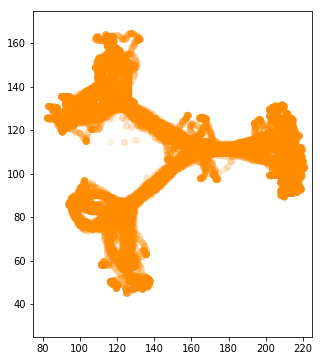

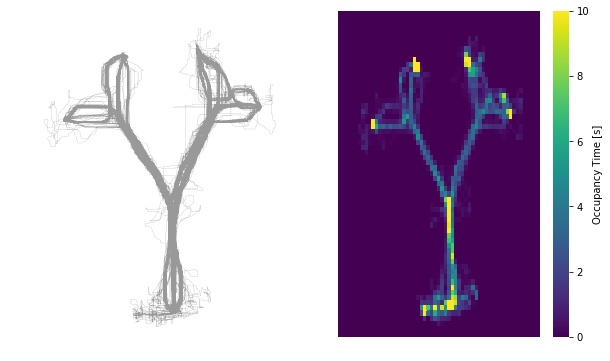

In [233]:
fig, ax = plt.subplots(figsize=(5,6))
ax.scatter(x,y,color='darkorange',alpha=0.1)
ax.set_ylim(25,175)
ax.set_xlim(75,225)

#rotate and center. For Maze only*
from scipy import signal

x2=y-110
x2=signal.medfilt(x2,31)

y2=-x+225
y2=signal.medfilt(y2,35)
goodIDs = y2<150

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

ax1.plot(x2[goodIDs],y2[goodIDs],color='grey',alpha=0.8, linewidth=0.2)
ax1.set_ylim(0,150)
ax1.axis('off')

xed = np.arange(70,230,2.5)
yed = np.arange(30,180,2.5)
H,a,b=np.histogram2d(x,y,bins=(xed,yed))

ax2=sns.heatmap(H/60,cmap='viridis',xticklabels=False,yticklabels=False,vmax=10,ax=ax2,
               cbar_kws={'label': 'Occupancy Time [s]'})
saveDir = '/Users/alexgonzalez/Google Drive/PostDoc/Data/Results/Behavior/'
fig.savefig(saveDir+ FolderName + 'MazeOccupancy.png',bbox_inches='tight',dpi = 500)



In [224]:
x

array([172.17741935, 172.17741935, 172.17741935, ..., 218.14516129,
       218.14516129, 217.74193548])

In [197]:
x2

array([  0.08064516,   0.08064516,   0.08064516, ..., -12.82258065,
       -12.82258065, -12.82258065])